In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

Versão de Python Neste Jupyter Notebook: 3.10.5


Gradiente descendente (GD) é um algoritmo que minimiza (ou maximiza) funções.
Para aplicar, comece em um conjunto inicial de valores de parâmetro de uma função
e mova iterativamente em direção a um conjunto de valores de parâmetro que
minimize a função. A minimização iterativa é alcançada usando cálculo, dando
passos na direção negativa do gradiente da função. O GD é importante porque a
otimização é uma grande parte do aprendizado de máquina. Além disso, o GD é fácil
de implementar, genérico e eficiente (rápido).

### Simple Function Minimization (and Maximization)

GD é um algoritmo de otimização iterativa de 1ª ordem para encontrar o mínimo de uma
função f. Uma função pode ser denotada como f ou f(x). Simplesmente, GD encontra o
erro mínimo minimizando (ou maximizando) uma função de custo. Uma função de
custo é algo que você deseja minimizar.

Vamos começar com um exemplo de minimização. Para encontrar o mínimo local de f, dê passos proporcionais ao negativo do gradiente de f no ponto atual. O
gradiente é a derivada (taxa de variação) de f. A única fraqueza de GD é que ele
encontra o mínimo local em vez do mínimo para toda a função.

Portanto, a derivada de xn é igual a nxnÿ1. Simplesmente, a
derivada é o produto do expoente vezes x com o expoente reduzido em
1. Para minimizar f(x) = x4 – 3x3 + 2 encontre a derivada, que é f'(x) = 4x3 –
9x2 . Assim, o 1º passo é sempre encontrar a derivada f'(x). O 2º passo é
plotar a função original para ter uma ideia de sua forma. O terceiro passo é
executar o GD. O quarto passo é plotar o mínimo local.

O primeiro exemplo encontra o mínimo local de f(x) e exibe f(x), f'(x),
e mínimo na subparcela conforme visto na Figura 4-1:

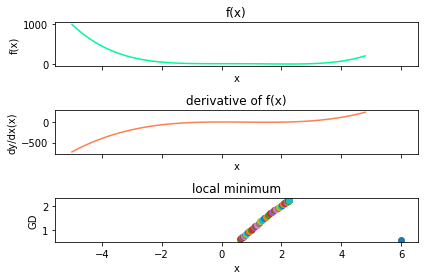

minimum: 2.2499646074278457 
iterations: 70


In [2]:
import matplotlib.pyplot as plt, numpy as np

def f(x):    
    return x**4 - 3 * x**3 + 2

def df(x):    
    return 4 * x**3 - 9 * x**2

if __name__ == "__main__":    
    x = np.arange(-5, 5, 0.2) 
    y, y_dx = f(x), df(x) 
    f, axarr = plt.subplots(3, sharex=True)

    axarr[0].plot(x, y, color='mediumspringgreen') 
    axarr[0].set_xlabel('x') 
    axarr[0].set_ylabel('f(x)') 
    axarr[0].set_title('f(x)')   
    
    axarr[1].plot(x, y_dx, color='coral') 
    axarr[1].set_xlabel('x')  
    axarr[1].set_ylabel('dy/dx(x)')   
    axarr[1].set_title('derivative of f(x)')   
    
    axarr[2].set_xlabel('x') 
    axarr[2].set_ylabel('GD')
    axarr[2].set_title('local minimum') 

    iterations, cur_x, gamma, precision = 0, 6, 0.01, 0.00001  
    previous_step_size = cur_x 

    while previous_step_size > precision: 
        prev_x = cur_x   
        cur_x += -gamma * df(prev_x)   
        previous_step_size = abs(cur_x - prev_x)     
        iterations += 1 
        axarr[2].plot(prev_x, cur_x, "o")  
        
    f.subplots_adjust(hspace=0.3)
    f.tight_layout()   
    plt.show()  
    print ('minimum:', cur_x, '\niterations:', iterations)

O exemplo de código começa importando matplotlib e numpy. Ele
continua com a função f(x) usada para plotar a função original e a função df(x)
usada para plotar a derivada. O bloco principal começa criando valores para f(x).
Ele continua criando uma subtrama. GD começa inicializando variáveis.
A variável cur_x é o ponto de partida para a simulação. Gama variável é o
tamanho do passo. A precisão variável é a tolerância. Tolerância menor
se traduz em mais precisão, mas requer mais iterações (recursos). A
simulação continua até o tamanho_do_passo_anterior ser maior que a precisão.
Cada iteração multiplica -gamma (step_size) pelo gradiente (derivado) no
ponto atual para movê-lo para o mínimo local.

A variável previous_step_size recebe então a diferença entre cur_x e prev_x.
Cada ponto é plotado. O mínimo para f(x) resolvendo para x é aproximadamente
2,25. Sei que esse resultado está correto porque o calculei manualmente.
Confira http://www.dummies.com/education/math/calculus/ how-to-find-localextrema-
with-the-first-derivative-test/ para boa lição sobre como calcular manualmente.

O segundo exemplo encontra o mínimo e máximo local de f(x) =
x3 – 6x2 + 9x + 15. Primeiro encontre f'(x), que é 3x2 – 12x + 9. Em seguida,
encontre o mínimo local, gráfico, máximo local , e enredo. Não uso uma subtrama
neste caso porque a visualização não é tão rica. Ou seja, é muito mais fácil ver o
mínimo e o máximo locais aproximados observando um gráfico de f(x) e mais fácil
ver como o processo GD faz sua mágica.

minimum: 3.0001526323101704 iterations: 144
maximum: 0.9998475518984531 iterations: 127


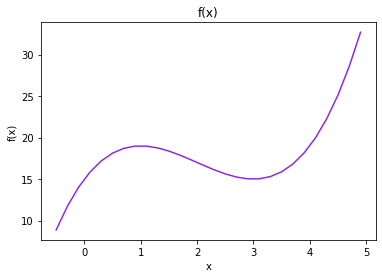

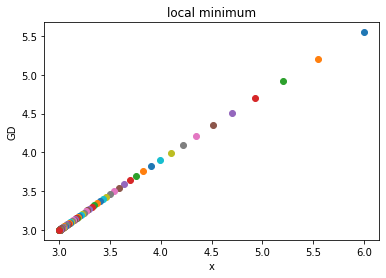

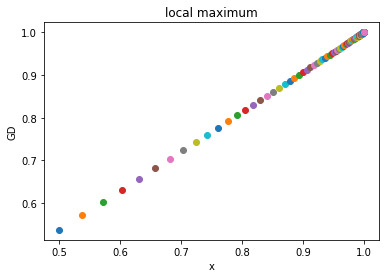

In [3]:
import matplotlib.pyplot as plt, numpy as np

def f(x):   
    return x**3 - 6 * x**2 + 9 * x + 15

def df(x):   
    return 3 * x**2 - 12 * x + 9

if __name__ == "__main__":
    x = np.arange(-0.5, 5, 0.2) 
    y = f(x)    
    
    plt.figure('f(x)')
    plt.xlabel('x') 
    plt.ylabel('f(x)')   
    plt.title('f(x)')
    plt.plot(x, y, color='blueviolet')    
    plt.figure('local minimum') 
    plt.xlabel('x')
    plt.ylabel('GD')
    plt.title('local minimum') 
    
    iterations, cur_x, gamma, precision = 0, 6, 0.01, 0.00001   
    previous_step_size = cur_x   
    
    while previous_step_size > precision:    
        prev_x = cur_x       
        cur_x += -gamma * df(prev_x)  
        previous_step_size = abs(cur_x - prev_x)     
        iterations += 1   
        plt.plot(prev_x, cur_x, "o") 
        
    local_min = cur_x 
    print ('minimum:', local_min, 'iterations:', iterations)   
    
    plt.figure('local maximum') 
    plt.xlabel('x')   
    plt.ylabel('GD') 
    plt.title('local maximum')  
    
    iterations, cur_x, gamma, precision = 0, 0.5, 0.01, 0.00001  
    previous_step_size = cur_x
        
    while previous_step_size > precision:
        prev_x = cur_x   
        cur_x += -gamma * -df(prev_x)   
        previous_step_size = abs(cur_x - prev_x)    
        iterations += 1    
        plt.plot(prev_x, cur_x, "o")   
    
    local_max = cur_x   
    print ('maximum:', local_max, 'iterations:', iterations)   
    plt.show()

O código começa importando as bibliotecas matplotlib e numpy. Ele
continua com as funções f(x) e df(x), que representam a função original e
sua derivada algoritmicamente. O bloco principal começa criando dados para
f(x) e plotando-os. Ele continua encontrando o mínimo e o máximo locais e
plotando-os. Observe que cur_x (o ponto inicial) para mínimo local é 6,
enquanto é 0,5 para máximo local.

É aqui que a ciência de dados é mais uma arte do que uma ciência, porque
encontrei esses pontos por tentativa e erro. Observe também que GD para o
máximo local é a negação da derivada. Mais uma vez, sei que os resultados
estão corretos porque calculei manualmente o mínimo e o máximo locais. A
principal razão pela qual usei plotagens separadas em vez de uma subparcela
para este exemplo é demonstrar por que é tão importante plotar f(x). Apenas
olhando para o gráfico, você pode dizer que o máximo local de x para f(x) está
próximo de um, e o mínimo local de x para f(x) está próximo de 3. Além disso,
você pode ver que o função tem um máximo geral que é maior que 1 deste
gráfico. As Figuras 4-2, 4-3 e 4-4 fornecem as visualizações.

### Minimização da Função Sigmoide (e Maximização)

Uma função sigmóide é uma função matemática com uma curva em forma de S ou
sigmóide. É muito importante na ciência de dados por vários motivos. Primeiro, é facilmente
diferenciável em relação aos parâmetros de rede, que são fundamentais no treinamento
de redes neurais. Em segundo lugar, as funções de distribuição cumulativas para muitas
distribuições de probabilidade comuns são sigmoidais. Em terceiro lugar, muitos processos
naturais (por exemplo, curvas de aprendizado complexas) seguem uma curva sigmoidal ao
longo do tempo. Portanto, uma função sigmóide é frequentemente usada se
nenhum modelo matemático específico estiver disponível.

O primeiro exemplo encontra o mínimo local da função sigmoide:

minimum: 0.0009901574660713482 
iterations: 231


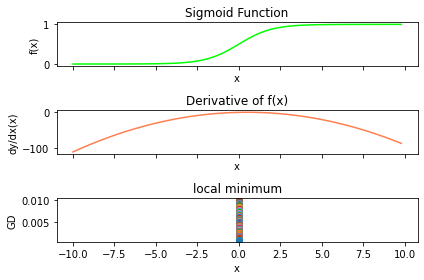

In [1]:
import matplotlib.pyplot as plt, numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def df(x):
    return x * (1-x)

if __name__ == "__main__":
    x = np.arange(-10., 10., 0.2)
    y, y_dx = sigmoid(x), df(x)
    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].plot(x, y, color='lime')
    axarr[0].set_xlabel('x')
    axarr[0].set_ylabel('f(x)')
    axarr[0].set_title('Sigmoid Function')
    axarr[1].plot(x, y_dx, color='coral')
    axarr[1].set_xlabel('x')
    axarr[1].set_ylabel('dy/dx(x)')
    axarr[1].set_title('Derivative of f(x)')
    axarr[2].set_xlabel('x')
    axarr[2].set_ylabel('GD')
    axarr[2].set_title('local minimum')
    iterations, cur_x, gamma, precision = 0, 0.01, 0.01, 0.00001
    previous_step_size = cur_x
    
    while previous_step_size > precision:
        prev_x = cur_x
        cur_x += -gamma * df(prev_x)
        previous_step_size = abs(cur_x - prev_x)
        iterations += 1
        plt.plot(prev_x, cur_x, "o")
    
    f.subplots_adjust(hspace=0.3)
    f.tight_layout()
    print ('minimum:', cur_x, '\niterations:', iterations)
    plt.show()

O código começa importando matplotlib e numpy. Ele continua com as funções
sigmoid(x) e df(x), que representam a função sigmoid e sua derivada
algoritmicamente. O bloco principal começa criando dados para f(x) ef'(x). Ele
continua criando subparcelas para f(x), f'(x) e o mínimo local. Nesse caso, o uso
de subtramas foi bom para visualização. É fácil ver pelos gráficos f(x) e f'(x)
(Figura 4-5) que o mínimo local está próximo de 0. Em seguida, o código executa
GD para encontrar o mínimo local e plota-o.

Novamente, o ponto de partida para GD, cur_x, foi encontrado por
tentativa e erro. Se você iniciar cur_x mais longe do mínimo local (você pode
estimar isso observando a subtrama de f'(x)), o número de iterações aumenta
porque leva mais tempo para o algoritmo GD convergir para o mínimo local.
Como esperado, o mínimo local é aproximadamente 0.

O segundo exemplo encontra o máximo local da função sigmoide:

maximum: 0.9990096316387825 
iterations: 1150


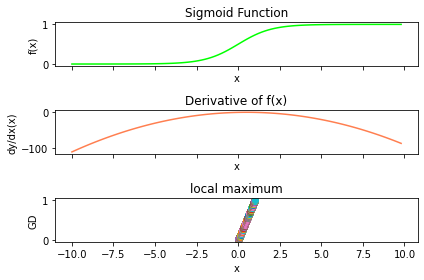

In [2]:
import matplotlib.pyplot as plt, numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def df(x):
    return x * (1-x)

if __name__ == "__main__":
    x = np.arange(-10., 10., 0.2)
    y, y_dx = sigmoid(x), df(x)
    f, axarr = plt.subplots(3, sharex=True)
    axarr[0].plot(x, y, color='lime')
    axarr[0].set_xlabel('x')
    axarr[0].set_ylabel('f(x)')
    axarr[0].set_title('Sigmoid Function')
    axarr[1].plot(x, y_dx, color='coral')
    axarr[1].set_xlabel('x')
    axarr[1].set_ylabel('dy/dx(x)')
    axarr[1].set_title('Derivative of f(x)')
    axarr[2].set_xlabel('x')
    axarr[2].set_ylabel('GD')
    axarr[2].set_title('local maximum')
    iterations, cur_x, gamma, precision = 0, 0.01, 0.01, 0.00001
    previous_step_size = cur_x

    while previous_step_size > precision:
        prev_x = cur_x
        cur_x += -gamma * -df(prev_x)
        previous_step_size = abs(cur_x - prev_x)
        iterations += 1
        plt.plot(prev_x, cur_x, "o")
    f.subplots_adjust(hspace=0.3)
    f.tight_layout()
    print ('maximum:', cur_x, '\niterations:', iterations)
    plt.show()

O código começa importando matplotlib e numpy. Ele continua com as funções
sigmoid(x) e df(x), que representam a função sigmoid e sua derivada
algoritmicamente. O bloco principal começa criando dados para f(x) ef'(x). Ele
continua criando subparcelas para f(x), f'(x) e o máximo local (Figura 4-6). É fácil
ver no gráfico de f(x) que o máximo local está próximo de 1. Em seguida, o
código executa GD para encontrar o máximo local e plotá-lo. Novamente, o ponto
de partida para GD, cur_x, foi encontrado por tentativa e erro. Se você iniciar cur_x
mais longe do máximo local (você pode estimar isso observando a subtrama de
f(x)), o número de iterações aumenta porque leva mais tempo para o algoritmo
GD convergir para o máximo local. Como esperado, o máximo local é
aproximadamente 1.

### Minimização da Distância Euclidiana Controlando o tamanho do passo

A distância euclidiana é a distância em linha reta comum entre dois pontos
no espaço euclidiano. Com esta distância, o espaço euclidiano torna-se um
espaço métrico. A norma associada é a norma euclidiana (EN). A EN atribui
a cada vetor o comprimento de sua seta. Então, EN é realmente apenas a
magnitude de um vetor. Um espaço vetorial no qual uma norma é definida é o
espaço vetorial normado.

Para encontrar o mínimo local de f(x) no espaço tridimensional (3-D), o primeiro passo é encontrar o mínimo para todos os vetores 3-D. O segundo
passo é criar um vetor aleatório 3-D [x, y, z]. O terceiro passo é escolher um
ponto de partida aleatório e, em seguida, dar pequenos passos na direção
oposta do gradiente f'(x) até chegar a um ponto onde o gradiente é muito pequeno.
Cada pequeno passo (do vetor atual para o próximo vetor) é medido com a
métrica ED. A métrica ED é a distância entre dois pontos no espaço euclidiano. A
métrica é necessária porque precisamos saber como nos mover a cada
pequeno passo. Assim, a métrica ED complementa GD para encontrar o
mínimo local no espaço 3-D.

O exemplo de código localiza o mínimo local da função sigmoide em espaço 3-D:

minimum: 9.990929810586089e-08 
iterations: 1167


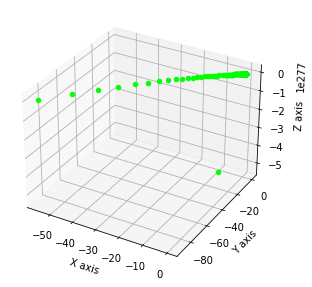

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random, numpy as np
from scipy.spatial import distance

def step(v, direction, step_size): 
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

def sigmoid_gradient(v):  
    return [v_i * (1-v_i) for v_i in v]

def mod_vector(v):   
    for i, v_i in enumerate(v):
    
        if v_i == float("inf") or v_i == float("-inf"):
            v[i] = random.randint(-1, 1)   
    
    return v

if __name__ == "__main__": 
    v = [random.randint(-10, 10) for i in range(3)]
    tolerance = 0.0000001
    iterations = 1  
    fig = plt.figure('Euclidean')  
    ax = fig.add_subplot(111, projection='3d')  
    while True:  
        gradient = sigmoid_gradient(v)    
        next_v = step(v, gradient, -0.01)    
        
        xs = gradient[0]
        ys = gradient[1]  
        zs = gradient[2]   
        
        ax.scatter(xs, ys, zs, c='lime', marker='o')
        v = mod_vector(v)    
        next_v = mod_vector(next_v)  
        test_v = distance.euclidean(v, next_v) 

        if test_v < tolerance:   
            break        
        v = next_v   
        iterations += 1 

    print ('minimum:', test_v, '\niterations:', iterations)   
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')  
    ax.set_zlabel('Z axis') 
    plt.tight_layout()
    plt.show()

O código começa importando as bibliotecas matplotlib, mpl_toolkits, random,
numpy e scipy. A função step() move um vetor em uma direção (com base no gradiente), por
um tamanho de passo. A função sigmoid_gradient() é o f'(sigmoid) retornado como um
ponto no espaço 3-D. A função mod_vector() garante que um vetor errado gerado pela
simulação seja tratado corretamente. O bloco principal começa criando um vetor 3-D gerado
aleatoriamente [x, y, z] como ponto de partida para a simulação. Continua criando uma
tolerância (precisão). Uma tolerância menor resulta em um resultado mais preciso. Uma
subtrama é criada para manter uma renderização 3-D do mínimo local (Figura 4-7). A
simulação GD cria um conjunto de vetores 3-D influenciados pelo gradiente sigmoide até que
o gradiente seja muito pequeno. O tamanho (magnitude) do gradiente é calculado pela métrica
ED. O mínimo local, como esperado, é próximo de 0.

### Estabilizando a Minimização da Distância Euclidiana com a Simulação de Monte Carlo

O experimento da distância euclidiana no exemplo anterior é ancorado por um processo
estocástico. Ou seja, o vetor inicial v é gerado estocasticamente por randomint(). Como
resultado, cada execução do experimento GD gera um resultado diferente para o número
de iterações. Do Capítulo 2, já sabemos que a simulação de Monte Carlo (MCS) modela
com eficiência processos estocásticos (aleatórios). No entanto, o MCS também pode
estabilizar experimentos estocásticos.

O exemplo de código primeiro envolve o experimento GD em um loop que é executado n número de simulações. Com n simulações, um número médio de iterações é
calculado. O código resultante é então agrupado em outro loop que executa m tentativas.
Com m tentativas, é calculado um intervalo médio entre cada número médio de iterações. O
intervalo é calculado subtraindo o mínimo da iteração média máxima. Quanto menor a
lacuna, mais estável (preciso) o resultado. Para aumentar a precisão, aumente simulações (n). A única limitação é o poder de computação. Ou seja, executar 1.000
simulações exige muito mais poder de computação do que 100. Resultados
estáveis (precisos) permitem a comparação com experimentos alternativos.

In [5]:
import random, numpy as np
from scipy.spatial import distance

def step(v, direction, step_size):
    return [v_i + step_size * direction_i 
            for v_i, direction_i in zip(v, direction)]
    
def sigmoid_gradient(v):   
    return [v_i * (1-v_i) for v_i in v]

def mod_vector(v):
    for i, v_i in enumerate(v):
        if v_i == float("inf") or v_i == float("-inf"):
            v[i] = random.randint(-1, 1)
    return v

if __name__ == "__main__": 
    trials= 10   
    sims = 10  
    avg_its = []   
    for _ in range(trials):   
        its = [] 
        for _ in range(sims):   
            v = [random.randint(-10, 10) for i in range(3)] 
            tolerance = 0.0000001 
            iterations = 0     
            while True: 
                gradient = sigmoid_gradient(v)  
                next_v = step(v, gradient, -0.01)    
                v = mod_vector(v)
                next_v = mod_vector(next_v) 
                test_v = distance.euclidean(v, next_v) 
                
                if test_v < tolerance:
                    break
                
                v = next_v   
                iterations += 1
            its.append(iterations) 
        a = round(np.mean(its))
        avg_its.append(a) 
    gap = np.max(avg_its) - np.min(avg_its)   
    print (trials, 'trials with', sims, 'simulations each:')   
    print ('gap', gap)  
    print ('avg iterations', round(np.mean(avg_its)))

10 trials with 10 simulations each:
gap 223
avg iterations 1054


A saída é para 10, 100 e 1.000 simulações. Executando 1.000
simulações dez vezes (tentativas), a diferença cai para 13. Portanto, há alta
confiança de que o número de iterações necessárias para minimizar a função
está próximo de 1.089. Podemos estabilizar ainda mais agrupando o código em
outro loop para diminuir a variação no intervalo e no número de iterações. No
entanto, o tempo de processamento do computador torna-se um problema. Aproveitar
o MCS para esse tipo de experimento é um forte argumento para a computação em
nuvem. Pode ser difícil entender esse aplicativo de MCS, mas é uma ferramenta
muito poderosa para trabalhar e resolver problemas de ciência de dados.

### Substituindo um método NumPy para acelerar Minimização da Distância Euclidiana

Como as matrizes numpy são mais rápidas que as listas Python, segue-se
que usar um método numpy seria mais eficiente para calcular a distância euclidiana.
O exemplo de código substitui np.linalg.norm() por distance.euclidean() para
calcular a distância euclidiana para o experimento GD.

minimum: -0.3109901627541012 
iterations: 1


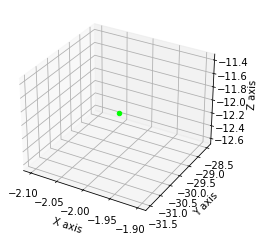

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random, numpy as np

def step(v, direction, step_size):
    return [v_i + step_size * direction_i   
            for v_i, direction_i in zip(v, direction)]

def sigmoid_gradient(v):
    return [v_i * (1-v_i) for v_i in v]

def round_v(v):    
    return np.round(v, decimals=3)

if __name__ == "__main__": 
    v = [random.randint(-10, 10) for i in range(3)]    
    tolerance = 0.0000001   
    iterations = 1   
    fig = plt.figure('norm')  
    ax = fig.add_subplot(111, projection='3d')
    
    while True:   
        gradient = sigmoid_gradient(v) 
        next_v = step(v, gradient, -0.01)      
        round_gradient = round_v(gradient)
        
        xs = round_gradient[0]   
        ys = round_gradient[1]
        zs = round_gradient[2] 
        
        ax.scatter(xs, ys, zs, c='lime', marker='o')
        norm_v = np.linalg.norm(v)
        norm_next_v = np.linalg.norm(next_v)
        test_v = norm_v - norm_next_v   
    
        if test_v < tolerance:  
            break 
    
        v = next_v  
        iterations += 1 
    
    print ('minimum:', test_v, '\niterations:', iterations)
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')   
    ax.set_zlabel('Z axis')
    
    plt.show()

O número de iterações é muito menor em 31 (Figura 4-8). No entanto, dado
que o experimento GD é estocástico, podemos usar MCS para comparação
objetiva. Usando a mesma metodologia MCS, o exemplo de código primeiro envolve
o experimento GD em um loop que executa n número de simulações. O código
resultante é então agrupado em outro loop que executa m tentativas.

In [7]:
import random, numpy as np

def step(v, direction, step_size):
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sigmoid_gradient(v):  
    return [v_i * (1-v_i) for v_i in v]

def round_v(v):
    return np.round(v, decimals=3)

if __name__ == "__main__": 
    trials = 10    
    sims = 10
    avg_its = []  
    for _ in range(trials):
        its = []    
        for _ in range(sims):  
            v = [random.randint(-10, 10) for i in range(3)] 
            tolerance = 0.0000001 
            iterations = 0     
            while True:  
                gradient = sigmoid_gradient(v)
                next_v = step(v, gradient, -0.01)
                norm_v = np.linalg.norm(v) 
                norm_next_v = np.linalg.norm(next_v)
                test_v = norm_v - norm_next_v   
                
                if test_v < tolerance:  
                    break  
                
                v = next_v  
                iterations += 1      
            its.append(iterations)
        a = round(np.mean(its))
        avg_its.append(a) 
    gap = np.max(avg_its) - np.min(avg_its)  
    print (trials, 'trials with', sims, 'simulations each:') 
    print ('gap', gap)
    print ('avg iterations', round(np.mean(avg_its)))

10 trials with 10 simulations each:
gap 525
avg iterations 220


O processamento é muito mais rápido usando numpy. O número médio de iterações é próximo a 193. Como tal, usar a alternativa numpy para calcular
a distância euclidiana é mais de cinco vezes mais rápido!

### Minimização e maximização estocástica do gradiente descendente

Até este ponto do capítulo, experimentos de otimização usaram lote GD. O lote GD calcula o gradiente usando todo o conjunto de dados. O GD estocástico
calcula o gradiente usando uma única amostra, por isso é computacionalmente

minimum: [6.937 1.509 0.107] with 30 iterations
iterations with no improvement: 0
magnitude of min vector: 7.100035140758108


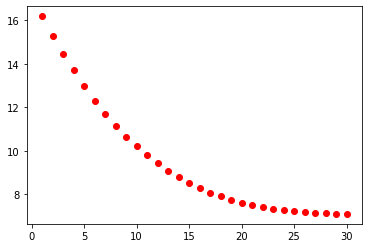

In [8]:
import matplotlib.pyplot as plt
import random, numpy as np

def rnd():    
        return [random.randint(-10,10) for i in range(3)]

def random_vectors(n): 
        ls = []   
        for v in range(n): 
                ls.append(rnd())  

        return ls
        
def sos(v):
        return sum(v_i ** 2 for v_i in v)

def sos_gradient(v):    
        return [2 * v_i for v_i in v]

def in_random_order(data):   
        indexes = [i for i, _ in enumerate(data)]
        random.shuffle(indexes)   
        for i in indexes:
                yield data[i]

if __name__ == "__main__":   
        
        v, x, y = rnd(), random_vectors(3), random_vectors(3) 
        data = list(zip(x, y)) 
        theta = v    
        alpha, value = 0.01, 0 
        min_theta, min_value = None, float("inf")    
        iterations_with_no_improvement = 0  
        n, x = 30, 1 
        for i, _ in enumerate(range(n)):
                y = np.linalg.norm(theta)
                plt.scatter(x, y, c='r')  
                x = x + 1  
                s = []     
                for x_i, y_i in data:  
                        s.extend([sos(theta), sos(x_i), sos(y_i)])   
                
                value = sum(s)
                
                if value < min_value:  
                        min_theta, min_value = theta, value  
                        iterations_with_no_improvement = 0      
                        alpha = 0.01   
                else:
                        iterations_with_no_improvement += 1 
                        alpha *= 0.9  
                
                g = []
                
                for x_i, y_i in in_random_order(data):
                        g.extend([sos_gradient(theta), sos_gradient(x_i),       
                                        sos_gradient(y_i)]) 
                        for v in g:   
                                theta = np.around(np.subtract(theta,alpha*np.array(v)),3)  
                        g = []
                
        print ('minimum:', np.around(min_theta, 4), 
                'with', i+1, 'iterations') 
        
        print ('iterations with no improvement:',
                iterations_with_no_improvement)
                
        print ('magnitude of min vector:', np.linalg.norm(min_theta))   
        
        plt.show()

minimum: [0.26 0.26 0.26] with 60 iterations
iterations with no improvement: 2
magnitude of min vector: 0.4503332099679081


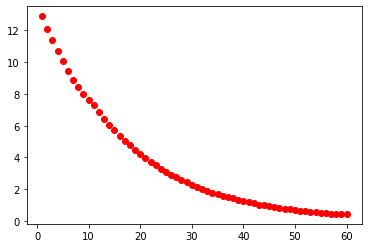

In [9]:
import matplotlib.pyplot as plt
import random, numpy as np

def rnd(): 
    return [random.randint(-10,10) for i in range(3)]

def random_vectors(n): 
    ls = []  
    for v in range(n):
        ls.append([random.randint(-10,10) for i in range(3)])
    
    return ls

def sos(v): 
    return sum(v_i ** 2 for v_i in v)

def sos_gradient(v):
    return [2 * v_i for v_i in v]

def in_random_order(data):   
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)  
    for i in indexes:
        yield data[i]

if __name__ == "__main__":
    v, x, y = rnd(), random_vectors(3), random_vectors(3)  
    data = list(zip(x, y))  
    theta = v    
    alpha, value = 0.01, 0 
    min_theta, min_value = None, float("inf")  
    iterations_with_no_improvement = 0    
    n, x = 60, 1
    
    for i, _ in enumerate(range(n)):   
        y = np.linalg.norm(theta)    
        plt.scatter(x, y, c='r')   
        x = x + 1  
        s = []     
        
        for x_i, y_i in data:   
            s.extend([sos(theta), sos(x_i), sos(y_i)])
        
        value = sum(s)
        if value < min_value:   
            min_theta, min_value = theta, value  
            iterations_with_no_improvement = 0
            alpha = 0.01 
        else:
            iterations_with_no_improvement += 1 
            alpha *= 0.9    
            
        g, t, m = [], [], [] 
        for x_i, y_i in in_random_order(data):
            g.extend([sos_gradient(theta), sos_gradient(x_i),  
                        sos_gradient(y_i)])  
            
            m = np.around([np.linalg.norm(x) for x in g], 2) 
            for v in g: 
                theta = np.around(np.subtract(theta,alpha*np.array(v)),3) 
                t.append(np.around(theta,2)) 
            
            mm = np.argmin(m)  
            theta = t[mm]
            g, m, t = [], [], [] 
        
    print ('minimum:', np.around(min_theta, 4),
            'with', i+1, 'iterations')
    
    print ('iterations with no improvement:', 
            iterations_with_no_improvement)
        
    print ('magnitude of min vector:', np.linalg.norm(min_theta))    
    
    plt.show()

maximum: [-4433.168   747.931  -249.066] with 100 iterations
magnitude of max vector: 4502.711757301482


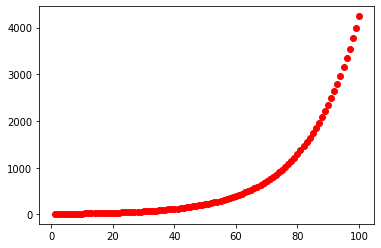

In [10]:
import matplotlib.pyplot as plt
import random, numpy as np

def rnd():  
    return [random.randint(-10,10) for i in range(3)]

def random_vectors(n):
    ls = []
      
    for v in range(n): 
        ls.append([random.randint(-10,10) for i in range(3)])  
    return ls

def sos_gradient(v):  
    return [2 * v_i for v_i in v]

def negate(function):
    def new_function(*args, **kwargs):  
        return np.negative(function(*args, **kwargs))
    
    return new_function

def in_random_order(data):
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes) 
    for i in indexes: 
        yield data[i]
        
if __name__ == "__main__": 
    v, x, y = rnd(), random_vectors(3), random_vectors(3) 
    data = list(zip(x, y)) 
    theta, alpha = v, 0.01  
    neg_gradient = negate(sos_gradient)   
    n, x = 100, 1
    
    for i, row in enumerate(range(n)):
        y = np.linalg.norm(theta)   
        plt.scatter(x, y, c='r')   
        x = x + 1    
        g = []      
        for x_i, y_i in in_random_order(data):
            g.extend([neg_gradient(theta), neg_gradient(x_i), 
                      neg_gradient(y_i)])
            for v in g:
                theta = np.around(np.subtract(theta,alpha*np.array(v)),3) 
            g = []  
        
    print ('maximum:', np.around(theta, 4),  
            'with', i+1, 'iterations')
    
    print ('magnitude of max vector:', np.linalg.norm(theta))  
    plt.show()

In [11]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

matplotlib: 3.5.2
numpy     : 1.23.0
scipy     : 1.8.1



### End.